In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
data = pd.read_csv("classic.csv")
print(data.isnull().sum())


Composer                            0
Nationality                         0
Born                                0
Died($)                             0
Biggest Piece                       0
Duration of Biggest Piece(mins)    36
dtype: int64


In [3]:
features = list(data.filter(like='Born'))  # Replace 'numeric' with the pattern for numerical columns

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[features])


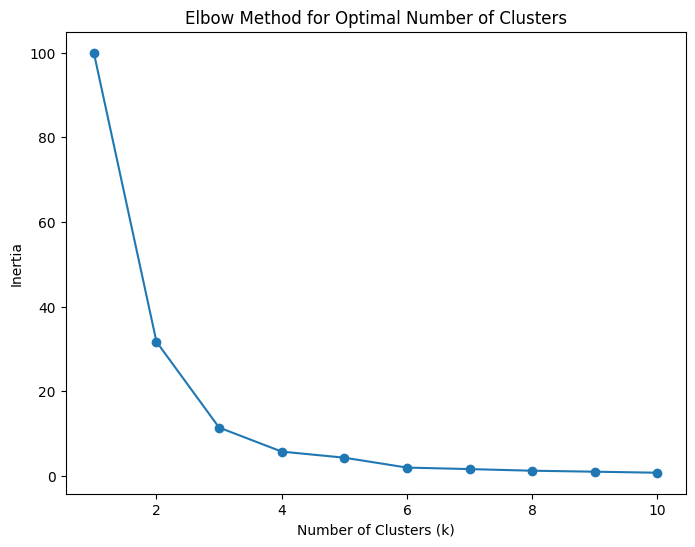

In [11]:
inertia_values = []
k_range = range(1, 11)  # Adjust k_range as needed

for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42)
  kmeans.fit(scaled_features)
  inertia = kmeans.inertia_
  inertia_values.append(inertia)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='-')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()


In [10]:
# Replace with your chosen k value based on the elbow plot
optimal_k = 80

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(scaled_features)
cluster_labels = kmeans.labels_


In [13]:
data['Date'] = cluster_labels

plt.figure(figsize=(8, 6))
plt.scatter(data['Born'], data['Died'], c=data['cluster'], cmap='viridis')
plt.title('Data Points Colored by Cluster')
plt.xlabel('Born 1')
plt.ylabel('Died 2')
plt.show()


KeyError: 'Died'

<Figure size 800x600 with 0 Axes>